In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Load, explore, and clean data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
products = pd.read_csv('product_attributes.csv')
stores = pd.read_csv('store_features.csv')

In [4]:
train[:3]

,store_id,product_key,calendar_date,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,join_quality,available_day
0,100,1,3/1/2015 12:00:00 AM,71.0,1,5.97,1,5.97,BOTH,1
1,100,1,3/2/2015 12:00:00 AM,65.0,6,33.85,6,33.85,BOTH,1
2,100,1,3/3/2015 12:00:00 AM,61.0,4,23.88,4,23.88,BOTH,1


In [5]:
# Create a datetime-format column
train['date'] = pd.to_datetime(train['calendar_date'])

In [6]:
len(train)

529802

In [7]:
# Remove rows where total units < 0
train = train[train['total_units'] >= 0]

In [8]:
len(train)

529627

In [9]:
train[:3]

,store_id,product_key,calendar_date,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,join_quality,available_day,date
0,100,1,3/1/2015 12:00:00 AM,71.0,1,5.97,1,5.97,BOTH,1,2015-03-01
1,100,1,3/2/2015 12:00:00 AM,65.0,6,33.85,6,33.85,BOTH,1,2015-03-02
2,100,1,3/3/2015 12:00:00 AM,61.0,4,23.88,4,23.88,BOTH,1,2015-03-03


In [10]:
# Sort by sum of total units
train.groupby('product_key').sum().sort('total_units', ascending = False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,store_id,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,available_day
product_key,,,,,,,
36,2001906,1167913.0,258612,501673.13,0,0.00,16094
29,2006473,1262816.0,258284,127772.98,129,51.60,15139
37,1699046,1090587.0,242817,237902.10,0,0.00,12718
1,1995872,1159736.0,161431,929462.36,37786,216096.23,16185
15,1923621,939180.0,152877,148120.58,214,152.12,15356


In [11]:
# Sort by total units sold
train.groupby('product_key').mean().sort('total_units', ascending = False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,store_id,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,available_day
product_key,,,,,,,
37,120.593797,77.483979,17.234509,16.885663,0.000000,0.000000,0.902690
36,122.015359,71.244617,15.762297,30.576774,0.000000,0.000000,0.980923
29,121.996291,76.846346,15.704019,7.768771,0.007843,0.003137,0.920472
1,122.026901,70.905845,9.869834,56.826997,2.310223,13.212046,0.989545
15,121.794416,59.490720,9.679435,9.378282,0.013549,0.009632,0.972268


In [12]:
# Sort by total units sold, when product is available
train[train['available_day'] == 1].groupby('product_key').mean().sort('total_units', ascending = False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,store_id,on_hand_qty,total_units,total_sales,promotional_units,promotional_sales,available_day
product_key,,,,,,,
37,120.444724,86.063542,19.092389,18.705936,0.000000,0.000000,1.0
29,121.802695,83.545238,17.060836,8.439988,0.008521,0.003408,1.0
36,122.069467,72.621783,16.068846,31.171438,0.000000,0.000000,1.0
1,122.009391,71.668582,9.974112,57.427393,2.334631,13.351636,1.0
15,121.762308,61.194996,9.955522,9.645779,0.013936,0.009906,1.0


In [13]:
# Sort by products with most unavailable days
train[train['available_day'] == 0].groupby('product_key')['product_key', 'available_day'].count().sort(
    'available_day', ascending = False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,product_key,available_day
product_key,,
33,2852,2852
34,2757,2757
12,2373,2373
57,2198,2198
40,2184,2184


## Time exploration

In [14]:
total_by_date = train.groupby('date').sum().reset_index()

In [15]:
total_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
date                 366 non-null datetime64[ns]
store_id             366 non-null int64
product_key          366 non-null int64
on_hand_qty          366 non-null float64
total_units          366 non-null int64
total_sales          366 non-null float64
promotional_units    366 non-null int64
promotional_sales    366 non-null float64
available_day        366 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 25.8 KB


In [51]:
total_by_date[['date', 'total_units']][:5]

,date,total_units
0,2015-03-01,8258
1,2015-03-02,6882
2,2015-03-03,6795
3,2015-03-04,6482
4,2015-03-05,5141


In [52]:
total_by_date['date'].describe()

count                     366
unique                    366
top       2015-07-19 00:00:00
freq                        1
first     2015-03-01 00:00:00
last      2016-02-29 00:00:00
Name: date, dtype: object

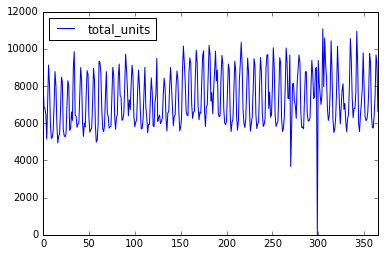

In [55]:
total_by_date[['date', 'total_units']].plot()

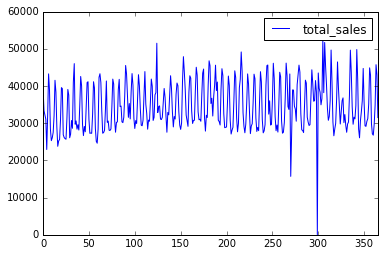

In [54]:
total_by_date[['date', 'total_sales']].plot()

### Get product availability per date-store

In [14]:
# The product_key for the item with most units sold, per date and store
def max_units_date_store(df, vars_list, groupby_list):
    df = df[vars_list]
    grouped = df.groupby(groupby_list).sum()
    unstacked = grouped.unstack()
    unstacked = unstacked.fillna(0)
    unstacked['max_units'] = unstacked.apply(lambda x: x.idxmax(axis=1)[1], axis = 1)
    max_units = pd.DataFrame(pd.DataFrame(unstacked['max_units']).to_records())
    return max_units

In [15]:
# For each date and store, get the product key with maximum units sold
max_units_df = max_units_date_store(train, ['store_id', 'product_key', 'date', 'total_units'], 
                    ['date', 'store_id', 'product_key'])

In [16]:
len(max_units_df)

16470

In [17]:
max_units_df[:5]

,date,store_id,max_units
0,2015-03-01,100,37
1,2015-03-01,101,36
2,2015-03-01,102,32
3,2015-03-01,103,36
4,2015-03-01,104,37


In [18]:
#max_units_df.to_csv('max_units_by_date_store.csv', index = False)

In [19]:
# Merge with store features data
merged = pd.merge(stores, max_units_df, on = 'store_id')

In [20]:
merged.shape

(16470, 159)

In [21]:
merged[:3]

,store_id,store_type,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,date,max_units
0,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-01,37
1,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-02,37
2,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-03,37


In [22]:
#merged.to_csv('walmart_merged.csv', index = False)

### Read in cleaned data

In [3]:
merged = pd.read_csv('walmart_merged.csv')

In [4]:
merged[:3]

,store_id,store_type,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,max_units
0,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.9301,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,37
1,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.9301,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,37
2,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.9301,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,37


Split into X and y for all store types

Note: We are keeping 'store_id' and 'date' columns, to be accessed after training the model.  The model will not be trained on these two columns.

In [23]:
X = merged.drop(['max_units', 'store_type'], axis = 1)
#X = X.ix[:, X.columns != 'store_id']
y = merged['max_units']

In [24]:
X[:3]

,store_id,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,date
0,100,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,-0.7564,...,-0.9301,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-01
1,100,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,-0.7564,...,-0.9301,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-02
2,100,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,-0.7564,...,-0.9301,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-03


In [25]:
y[:3]

0    37
1    37
2    37
Name: max_units, dtype: int64

In [26]:
len(y.value_counts())

38

Split into X, y for each store type

In [141]:
stores.store_type.value_counts()

A    31
B    11
C     3
Name: store_type, dtype: int64

In [113]:
# Split X, y by store type
merged_A = merged[merged['store_type'] == 'A']
merged_B = merged[merged['store_type'] == 'B']
merged_C = merged[merged['store_type'] == 'C']

In [173]:
len(merged_A), len(merged_B), len(merged_C)

(11346, 4026, 1098)

In [172]:
len(y_A.value_counts()), len(y_B.value_counts()), len(y_C.value_counts())

(34, 33, 20)

In [114]:
merged_A[:3]

,store_id,store_type,size,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,date,max_units
0,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-01,37
1,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-02,37
2,100,A,-0.4151,-1.4671,-0.2519,-1.2549,0.8203,0.9541,0.1564,-0.7934,...,-0.572,-0.3607,0.2221,-0.1311,1.1536,-0.4766,-0.3323,-1.1875,2015-03-03,37


In [115]:
X_A = merged_A.drop(['max_units', 'store_type'], axis = 1)
#X_A = X_A.ix[:, X_A.columns != 'store_id']
y_A = merged_A['max_units']

X_B = merged_B.drop(['max_units', 'store_type'], axis = 1)
#X_B = X_B.ix[:, X_B.columns != 'store_id']
y_B = merged_B['max_units']

X_C = merged_C.drop(['max_units', 'store_type'], axis = 1)
#X_C = X_C.ix[:, X_C.columns != 'store_id']
y_C = merged_C['max_units']

In [116]:
X_C.shape, y_C.shape

((1098, 157), (1098,))

## Split, train, evaluate

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools

In [157]:
# May want to set random seed for train_test_split
def split_train_score(X, y, test_size = 0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels = range(1,max(y)+1))
    print 'Accuracy:', accuracy_score(y_test, y_pred)
    return logreg, cm

In [93]:
# From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams["figure.figsize"] = [12, 10]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Build and evaluate model for all store types lumped together

In [70]:
logreg, cm = split_train_score(X, y, test_size = 0.3)

Accuracy: 0.524994940295


In [74]:
logreg, cm, X_train, X_test, y_train, y_test = split_train_score(X, y, test_size = 0.3)

Accuracy: 0.524994940295


Build and evaluate model for store type A

In [35]:
logreg_A, cm_A = split_train_score(X_A, y_A, test_size = 0.3)

Accuracy: 0.504406580494


Confusion matrix, without normalization


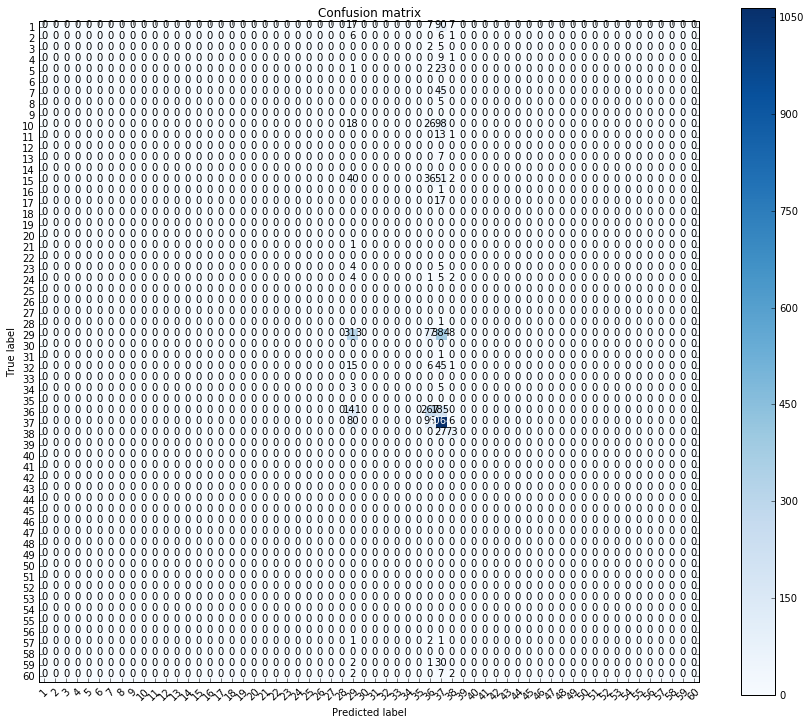

In [51]:
plot_confusion_matrix(cm_A, classes = range(1,61))

In [ ]:
# Removed store_id from feature set
# logreg_A, cm_A = split_train_score(X_A, y_A, test_size = 0.3)

Build and evaluate model for store type B

In [41]:
logreg_B, cm_B = split_train_score(X_B, y_B, test_size = 0.3)

Accuracy: 0.572847682119


Confusion matrix, without normalization


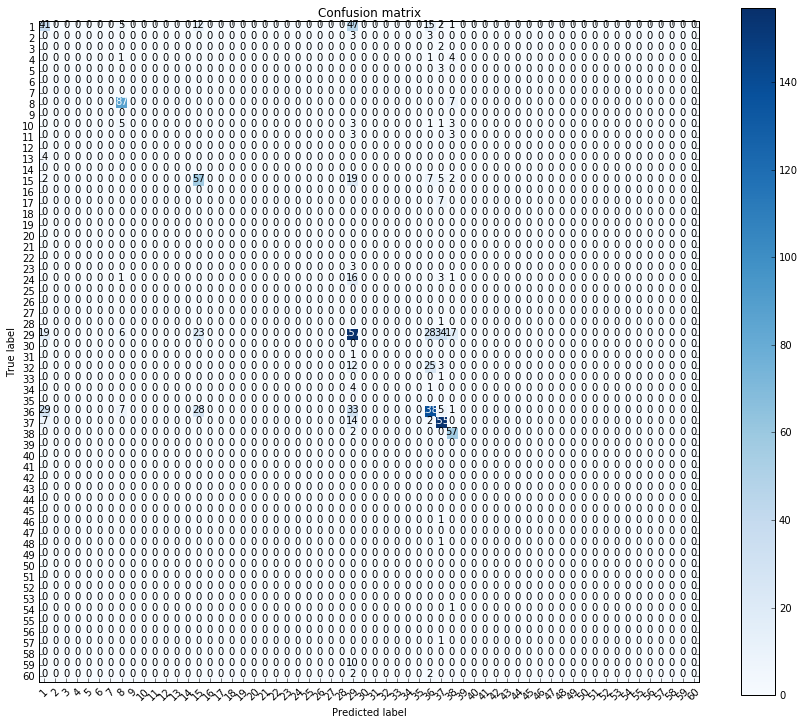

In [50]:
plot_confusion_matrix(cm_B, classes = range(1,61))

In [158]:
# Removed store_id from feature set
logreg_B, cm_B = split_train_score(X_B, y_B, test_size = 0.3)

Accuracy: 0.559602649007


Build and evaluate model for store type C

In [52]:
logreg_C, cm_C = split_train_score(X_C, y_C, test_size = 0.3)

Accuracy: 0.533333333333


Confusion matrix, without normalization


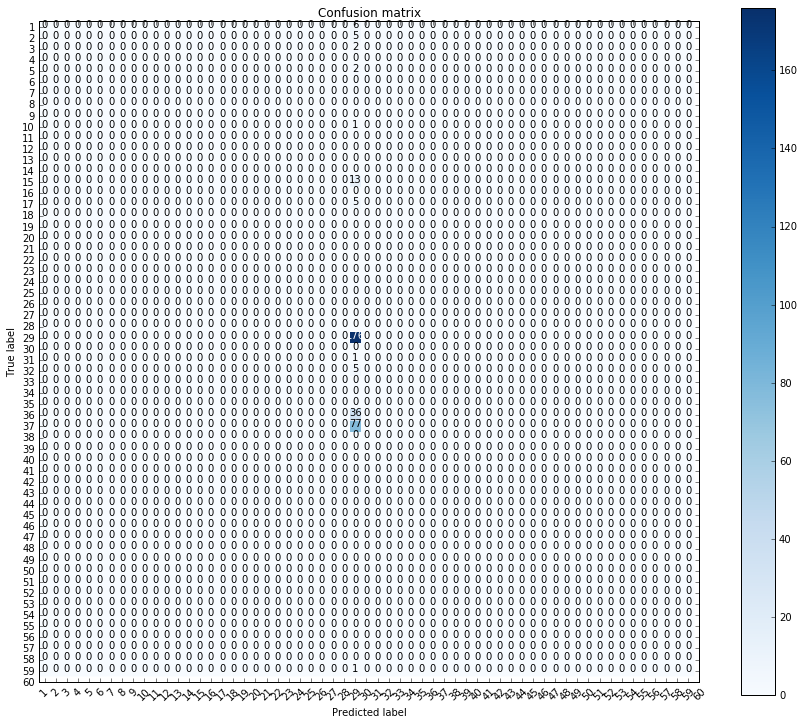

In [53]:
plot_confusion_matrix(cm_C, classes = range(1,61))

In [159]:
# Removed store_id from feature set
logreg_C, cm_C = split_train_score(X_C, y_C, test_size = 0.3)

Accuracy: 0.560606060606


In [ ]:
#y_A.value_counts()

In [ ]:
#pd.DataFrame(y_B.value_counts())

In [ ]:
# C stores have less diversity of products than B
# y_C.value_counts()

### Thoughts thus far
- The difference in accuracy between all store types and a store type-specific model is small.  Understandably, accuracy is higher for store types with fewer (more concentrated?) examples.

To try:
- Plot by time?
- US bank holidays dataset: https://gist.github.com/shivaas/4758439
- Multiply by availability
- Characterize the popular and next-best product, maybe the stores that sell them

For next time:
- Set random seed for splitting into training/testing and for training logreg model

## New stuff

In [40]:
# Not the accuracy we want
accuracy_score(y_test, logreg.predict(X_test.drop(['store_id', 'date'], axis = 1)))

0.53551912568306015

## Apply model to single store-date

In [44]:
test_input_store = X_test.iloc[0,]

In [52]:
y_pred_probs = logreg.predict_proba(test_input_store.drop(['store_id', 'date']).reshape(1, -1))

In [53]:
y_pred_probs

array([[ 0.02455772,  0.00452348,  0.00870679,  0.0006393 ,  0.0047173 ,
         0.0006989 ,  0.00090507,  0.000619  ,  0.00064961,  0.00084778,
         0.00089924,  0.00064134,  0.00078803,  0.02101217,  0.00071613,
         0.00048414,  0.00074031,  0.0006989 ,  0.00073827,  0.00048693,
         0.00071841,  0.35212997,  0.00057233,  0.02068043,  0.00061083,
         0.14800543,  0.39366434,  0.00046224,  0.00065523,  0.00065687,
         0.00067254,  0.0006989 ,  0.00066022,  0.00071971,  0.00086222,
         0.00415996]])

Create product availability vector

In [54]:
# Specify the date and store_id you want product availability for
filter_date = test_input_store['date']    #'2015-03-01'
filter_store_id = test_input_store['store_id']    #100

In [55]:
train_filtered = train[(train['date'] == filter_date) & (train['store_id'] == filter_store_id)]

In [56]:
prod_availability = []
for prod_id in class_ids:
    if prod_id in list(train_filtered['product_key']):
        prod_availability.append(int(train_filtered[train_filtered['product_key'] == prod_id]['available_day']))
    else:
        prod_availability.append(0)

In [58]:
len(prod_availability) == len(class_ids)

True

In [61]:
mod_pred_probs = prod_availability*y_pred_probs

In [62]:
mod_pred_probs

array([[ 0.02455772,  0.00452348,  0.        ,  0.0006393 ,  0.0047173 ,
         0.        ,  0.00090507,  0.000619  ,  0.00064961,  0.00084778,
         0.00089924,  0.        ,  0.00078803,  0.02101217,  0.        ,
         0.        ,  0.00074031,  0.        ,  0.00073827,  0.00048693,
         0.        ,  0.35212997,  0.        ,  0.02068043,  0.        ,
         0.14800543,  0.39366434,  0.00046224,  0.        ,  0.        ,
         0.00067254,  0.0006989 ,  0.        ,  0.00071971,  0.00086222,
         0.00415996]])

In [64]:
# Output: the product id with the highest prob
class_ids[np.argmax(mod_pred_probs)]

37

## Get predictions for all test cases

In [168]:
# Putting this section together...
# Split into training and tests sets; fit model; and get all possible product IDs
def split_train(X, y, test_size = 0.3, random_state = None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    # Fit model on appropriate features
    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train.drop(['store_id', 'date'], axis = 1), y_train)
    class_ids = sorted(list(y_train.value_counts().keys()))
    return X_test, y_test, logreg, class_ids

In [124]:
# Putting this together...
# Apply product availability to the model's probability predictions to get a modified version of predictions
# Predicts most popular product per store-date
def get_pred_mod(X_test, logreg, train, class_ids):
    y_pred_mod = []

    for i, row in X_test.iterrows():
        # Get the predicted probs from model
        y_pred_probs = logreg.predict_proba(row.drop(['store_id', 'date']).reshape(1, -1))
        # Retrieve product availability
        train_filtered = train[(train['date'] == row['date']) & (train['store_id'] == row['store_id'])]

        prod_availability = []
        for prod_id in class_ids:
            if prod_id in list(train_filtered['product_key']):
                prod_availability.append(int(train_filtered[train_filtered['product_key'] == prod_id]['available_day']))
            else:
                prod_availability.append(0)
        # Apply product availability to model predictions
        mod_pred_probs = prod_availability*y_pred_probs
        # Final output
        prediction = class_ids[np.argmax(mod_pred_probs)]
        y_pred_mod.append(prediction)
        
    return y_pred_mod

In [110]:
# Accuracy: (# correct predictions) / (total # predictions)
def accuracy(y_test, y_pred_mod):
    if len(y_test) != len(y_pred_mod):
        print 'Lists are of different lengths'
    else:
        count = 0
        for i in range(len(y_test)):
            if y_pred_mod[i] == y_test.iloc[i]:
                count += 1
        return float(count)/len(y_test)

Apply to all stores

In [163]:
X_test, y_test, logreg, class_ids = split_train(X, y)

In [164]:
y_pred_mod = get_pred_mod(X_test, logreg, train, class_ids)

In [167]:
accuracy(y_test, y_pred_mod)

0.5395668892936653

In [165]:
cm = confusion_matrix(y_test, y_pred_mod, labels = class_ids)

Confusion matrix, without normalization


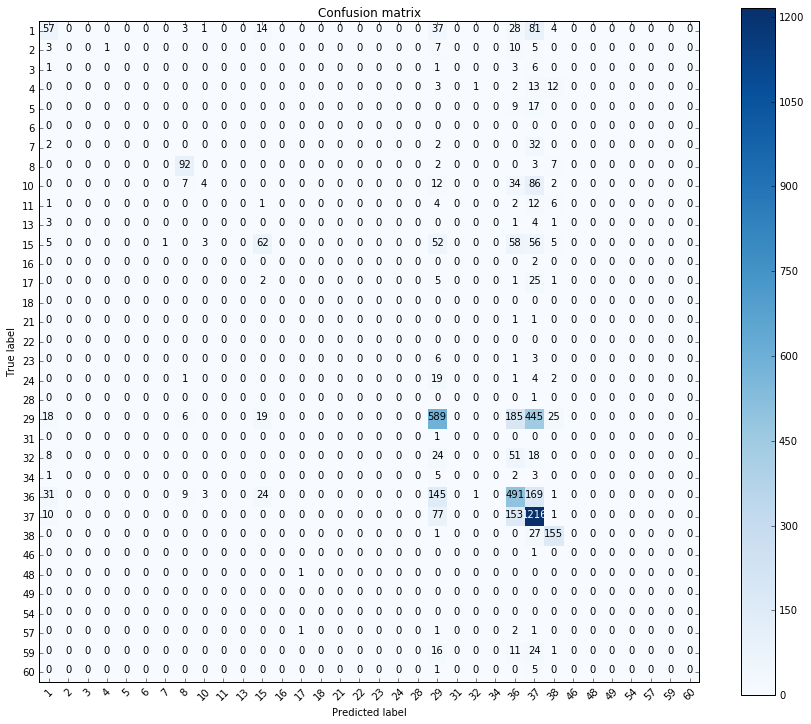

In [166]:
plot_confusion_matrix(cm, classes = class_ids)

In [149]:
# Save to csv for Steph
# pd.DataFrame(cm, columns=class_ids, index=class_ids).to_csv('confusion_matrix_1025.csv')

## Apply to each store type

Store Type A

In [121]:
X_test_A, y_test_A, logreg_A, class_ids_A = split_train(X_A, y_A)

In [125]:
y_pred_mod_A = get_pred_mod(X_test_A, logreg_A, train, class_ids_A)

In [126]:
accuracy(y_test_A, y_pred_mod_A)

0.5284958871915394

In [127]:
cm_A = confusion_matrix(y_test_A, y_pred_mod_A, labels = class_ids_A)

Confusion matrix, without normalization


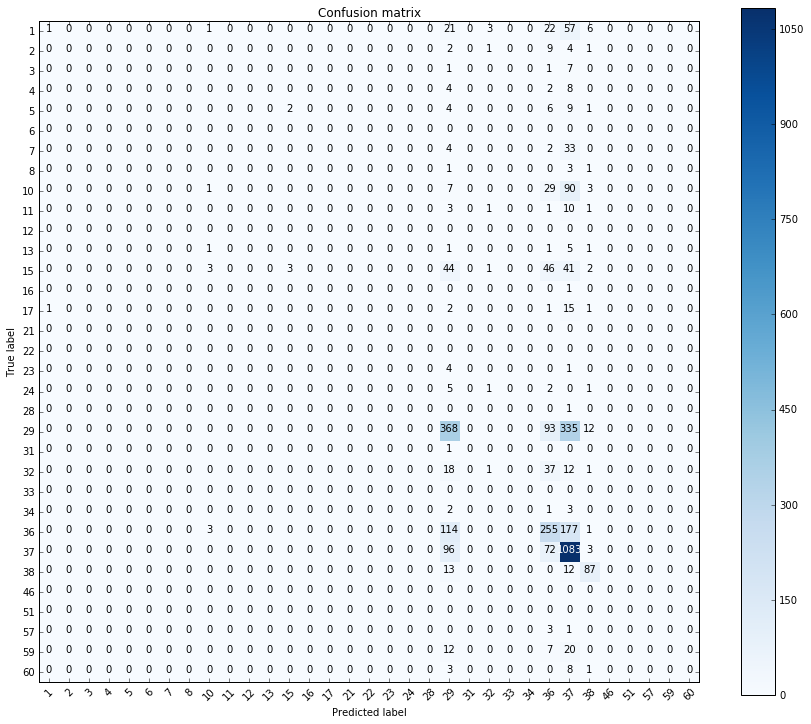

In [128]:
plot_confusion_matrix(cm_A, classes = class_ids_A)

Store type B

In [131]:
X_test_B, y_test_B, logreg_B, class_ids_B = split_train(X_B, y_B)

In [133]:
y_pred_mod_B = get_pred_mod(X_test_B, logreg_B, train, class_ids_B)

In [134]:
accuracy(y_test_B, y_pred_mod_B)

0.570364238410596

In [135]:
cm_B = confusion_matrix(y_test_B, y_pred_mod_B, labels = class_ids_B)

Confusion matrix, without normalization


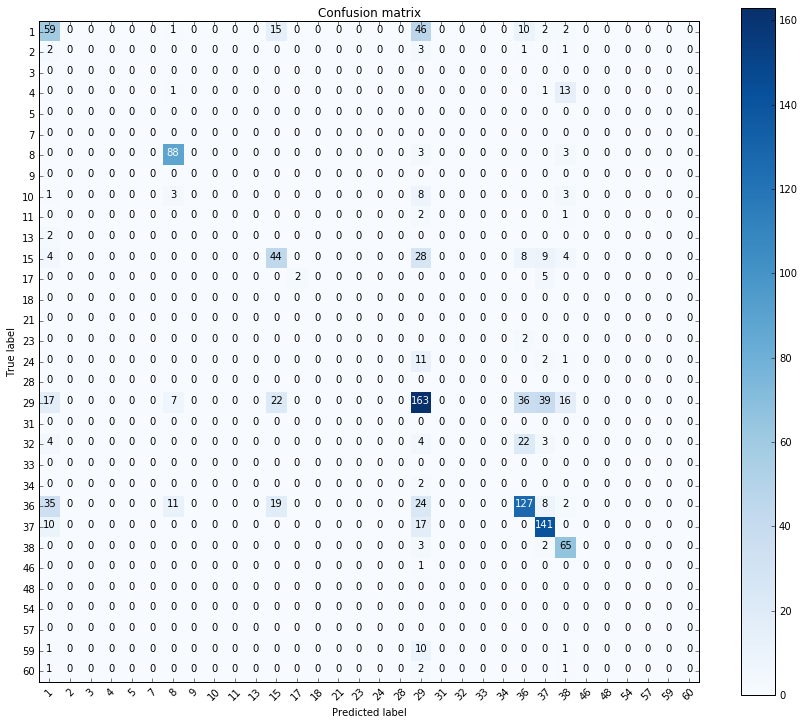

In [136]:
plot_confusion_matrix(cm_B, classes = class_ids_B)

Store type C

In [137]:
X_test_C, y_test_C, logreg_C, class_ids_C = split_train(X_C, y_C)

In [138]:
y_pred_mod_C = get_pred_mod(X_test_C, logreg_C, train, class_ids_C)

In [139]:
accuracy(y_test_C, y_pred_mod_C)

0.5757575757575758

In [140]:
cm_C = confusion_matrix(y_test_C, y_pred_mod_C, labels = class_ids_C)

Confusion matrix, without normalization


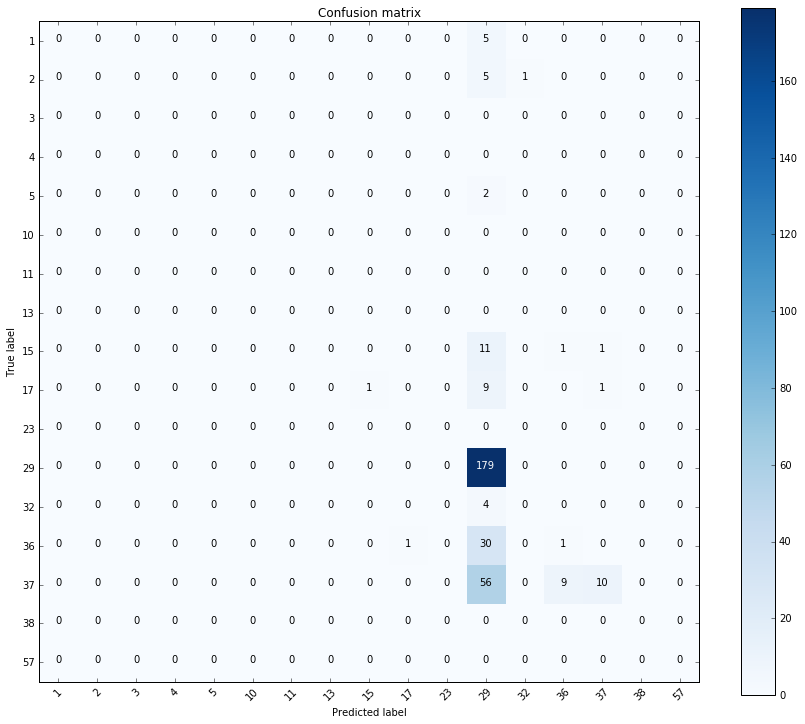

In [141]:
plot_confusion_matrix(cm_C, classes = class_ids_C)